In [32]:
import yfinance as yf
import matplotlib.pyplot as plt

In [13]:
data = yf.download('MSFT','2020-01-01', '2023-09-09')

[*********************100%%**********************]  1 of 1 completed


In [14]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,155.093674,22622100
2020-01-03,158.320007,159.949997,158.059998,158.619995,153.162491,21116200
2020-01-06,157.080002,159.100006,156.509995,159.029999,153.558380,20813700
2020-01-07,159.320007,159.669998,157.320007,157.580002,152.158264,21634100
2020-01-08,158.929993,160.800003,157.949997,160.089996,154.581879,27746500
...,...,...,...,...,...,...
2023-09-01,331.309998,331.989990,326.779999,328.660004,328.660004,14931200
2023-09-05,329.000000,334.850006,328.660004,333.549988,333.549988,18553900
2023-09-06,333.380005,334.459991,330.179993,332.880005,332.880005,17535800


In [10]:
import pandas as pd

In [15]:
data = data.reset_index()

In [16]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,158.779999,160.729996,158.330002,160.619995,155.093674,22622100
1,2020-01-03,158.320007,159.949997,158.059998,158.619995,153.162491,21116200
2,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.558380,20813700
3,2020-01-07,159.320007,159.669998,157.320007,157.580002,152.158264,21634100
4,2020-01-08,158.929993,160.800003,157.949997,160.089996,154.581879,27746500
...,...,...,...,...,...,...,...
923,2023-09-01,331.309998,331.989990,326.779999,328.660004,328.660004,14931200
924,2023-09-05,329.000000,334.850006,328.660004,333.549988,333.549988,18553900
925,2023-09-06,333.380005,334.459991,330.179993,332.880005,332.880005,17535800
926,2023-09-07,331.290009,333.079987,329.029999,329.910004,329.910004,18381000


In [23]:
training_set = data.iloc[:756, 5:6].values

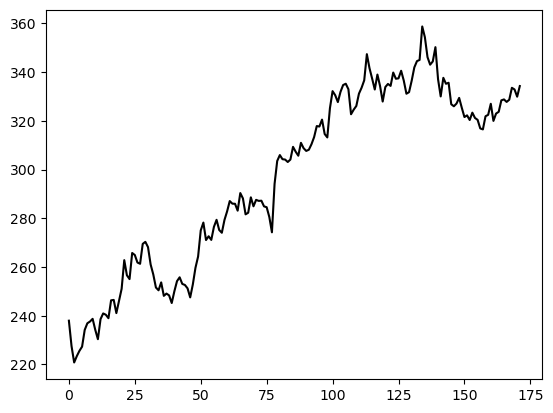

In [33]:
real_stock_price = data.iloc[756:, 5:6].values.tolist()
a = []
for i in range(172):
    a.append(float(real_stock_price[i][0]))
plt.plot(a, color = 'black')

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
df_stationarityTest = adfuller(training_set, autolag='AIC')

In [38]:
print("P-value: ", df_stationarityTest[1])

P-value:  0.35158828215360427


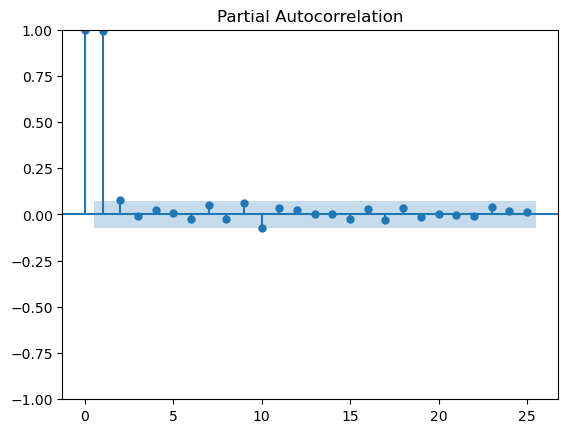

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(training_set, lags=25)

In [41]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(training_set, lags=10).fit()

In [42]:
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  756
Model:                    AutoReg(10)   Log Likelihood               -2209.875
Method:               Conditional MLE   S.D. of innovations              4.680
Date:                Mon, 11 Sep 2023   AIC                           4443.749
Time:                        09:28:54   BIC                           4499.126
Sample:                            10   HQIC                          4465.092
                                  756                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7754      0.898      1.978      0.048       0.016       3.535
y.L1           0.8898      0.036     24.428      0.000       0.818       0.961
y.L2           0.0940      0.048      1.939      0.0

In [43]:
pred = ar_model.predict(start=756, end=927, dynamic=False)

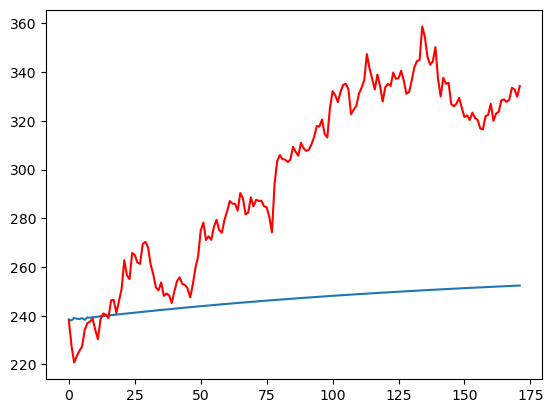

In [44]:
plt.plot(pred)
plt.plot(a, color='red')